In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset ===
with open("CS1QA_Codellama_student_evaluations.csv", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Step 2: Classify question types ===
def classify_question_type(q):
    if q.startswith("code_understanding"):
        return "Code Understanding"
    elif q.startswith("logical"):
        return "Logical Error"
    elif q.startswith("error"):
        return "Error"
    elif q.startswith("usage"):
        return "Function/Syntax Usage"
    elif q.startswith("algorithm"):
        return "Algorithm"
    elif q.startswith("task"):
        return "Task"
    elif q.startswith("reasoning"):
        return "Reasoning"
    elif q.startswith("code_explain"):
        return "Explanation"
    elif q.startswith("variable"):
        return "Meaning"
    else:
        return "Other"

df['question_type'] = df['questionType'].apply(classify_question_type)

# === Step 3: Extract score values from nested structure ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]
for metric in metrics:
    df[metric] = df[metric].apply(lambda x: x.get("score") if isinstance(x, dict) else None)

# === Step 4: Generate plots for each question type ===
def visualize_scores(flat_records, title):
    df_scores = pd.DataFrame(flat_records)
    grouped = df_scores.groupby("metric")["score"]
    avg_scores = grouped.mean()
    std_scores = grouped.std().fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_scores.index,
        avg_scores.values,
        yerr=std_scores.values,
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for qtype, subset in df.groupby("question_type"):
    flat_records = []
    for metric in metrics:
        for score in subset[metric].dropna():
            flat_records.append({"metric": metric, "score": score})
    if flat_records:
        visualize_scores(flat_records, title=f"Average Scores for '{qtype}' Questions")

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for metric in metrics:
        mean_val = subset[metric].mean()
        std_val = subset[metric].std()
        if pd.notna(mean_val) and pd.notna(std_val):
            row[metric.capitalize()] = f"{mean_val:.2f} ({std_val:.2f})"
        elif pd.notna(mean_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (0.00)"
        else:
            row[metric.capitalize()] = "N/A"
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df = summary_df[["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]]
summary_df = summary_df.round(2)

# === Display the table ===
from IPython.display import display
display(summary_df)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4000: character maps to <undefined>

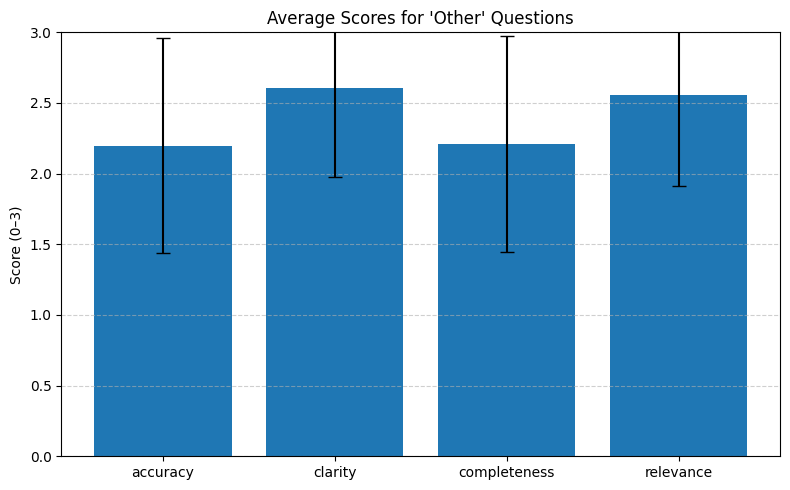

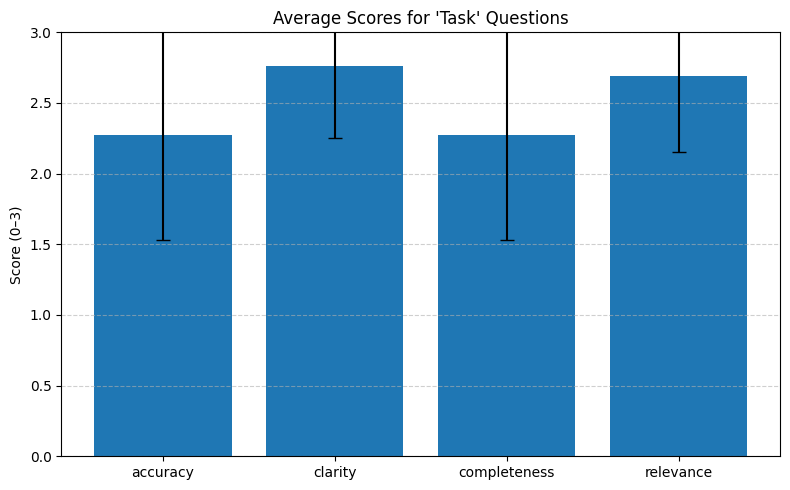

  Question Type     Accuracy Completeness      Clarity    Relevance
0         Other  2.20 (0.76)  2.21 (0.77)  2.61 (0.63)  2.55 (0.64)
1          Task  2.28 (0.74)  2.28 (0.74)  2.76 (0.51)  2.69 (0.54)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load dataset ===
df = pd.read_csv("CS1QA_Codellama_student_evaluations.csv")

# === Step 2: Classify question types ===
def classify_question_type(q):
    if isinstance(q, str):
        if q.startswith("code_understanding"):
            return "Code Understanding"
        elif q.startswith("logical"):
            return "Logical Error"
        elif q.startswith("error"):
            return "Error"
        elif q.startswith("usage"):
            return "Function/Syntax Usage"
        elif q.startswith("algorithm"):
            return "Algorithm"
        elif q.startswith("task"):
            return "Task"
        elif q.startswith("reasoning"):
            return "Reasoning"
        elif q.startswith("code_explain"):
            return "Explanation"
        elif q.startswith("variable"):
            return "Meaning"
    return "Other"

df["question_type"] = df["question"].apply(classify_question_type)

# === Step 3: Metrics already numeric ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]

# === Step 4: Visualization ===
def visualize_scores(subset, title):
    stats = subset[metrics].agg(["mean", "std"]).T.fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(stats.index, stats["mean"], yerr=stats["std"], capsize=5)
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

for qtype, subset in df.groupby("question_type"):
    if subset[metrics].notna().any().any():
        visualize_scores(subset, f"Average Scores for '{qtype}' Questions")

# === Step 5: Summary table ===
summary_rows = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for m in metrics:
        row[(m, "mean")] = subset[m].mean()
        row[(m, "std")]  = subset[m].std()
    summary_rows.append(row)

summary = pd.DataFrame(summary_rows)

pretty = {"Question Type": summary["Question Type"]}
for m in metrics:
    mean = summary[(m, "mean")]
    std = summary[(m, "std")].fillna(0)
    pretty[m.capitalize()] = mean.map(lambda x: f"{x:.2f}" if pd.notna(x) else "N/A") + \
                              " (" + std.map(lambda x: f"{x:.2f}") + ")"

summary_df = pd.DataFrame(pretty)[
    ["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]
]

print(summary_df)



Question type distribution:

question_type
Other                    2391
Code Understanding       1142
Task                      963
Function/Syntax Usage     417
Error                     397
Reasoning                 177
Logical Error              44
Algorithm                  12
Name: count, dtype: int64


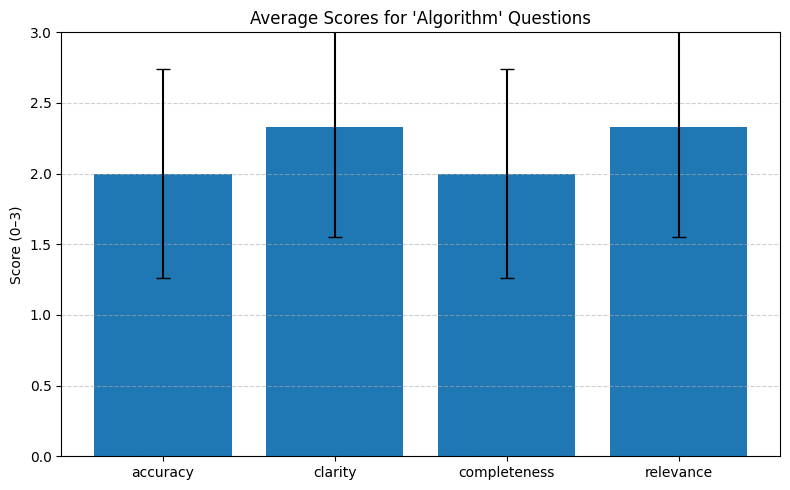

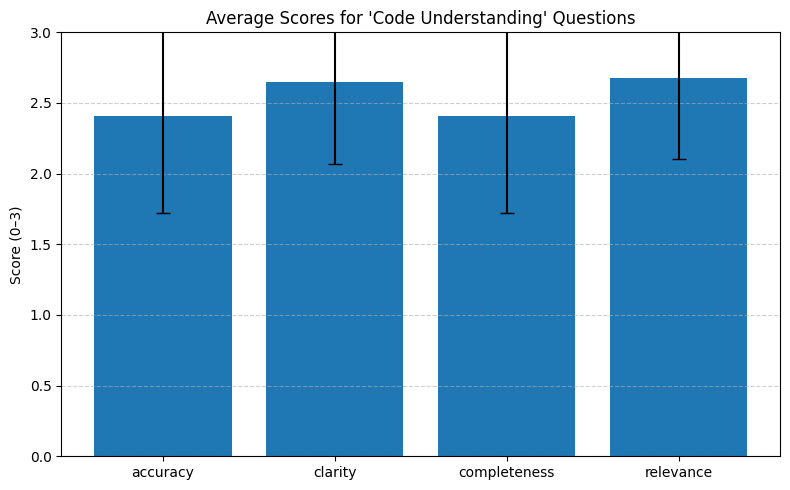

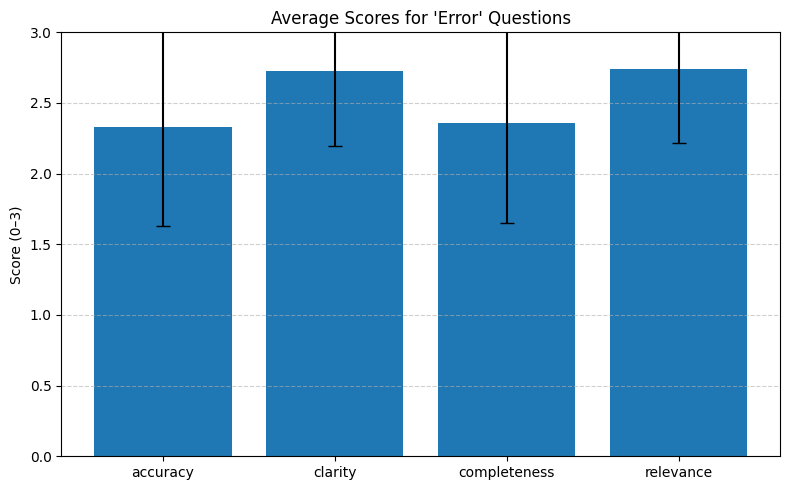

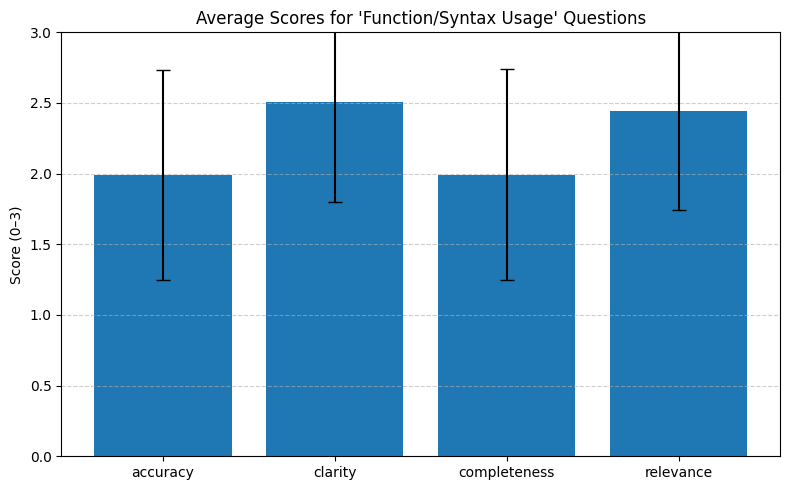

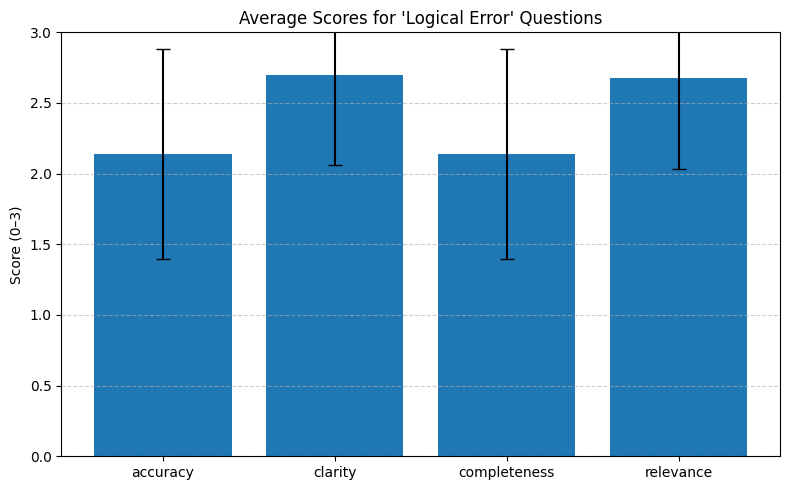

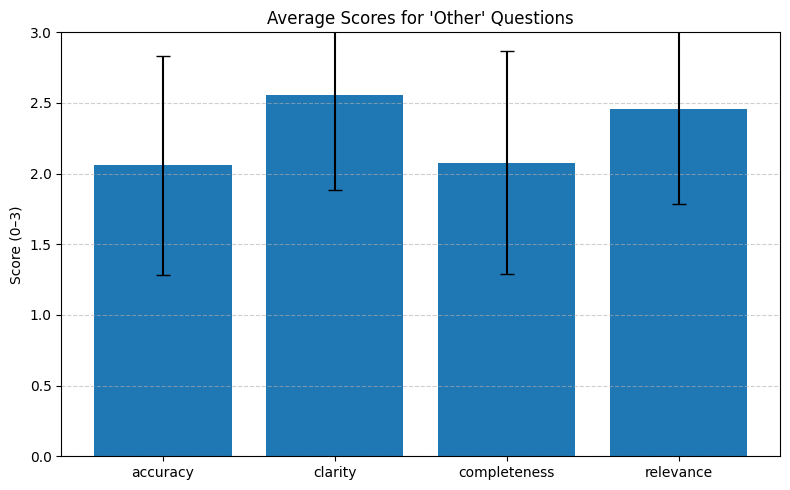

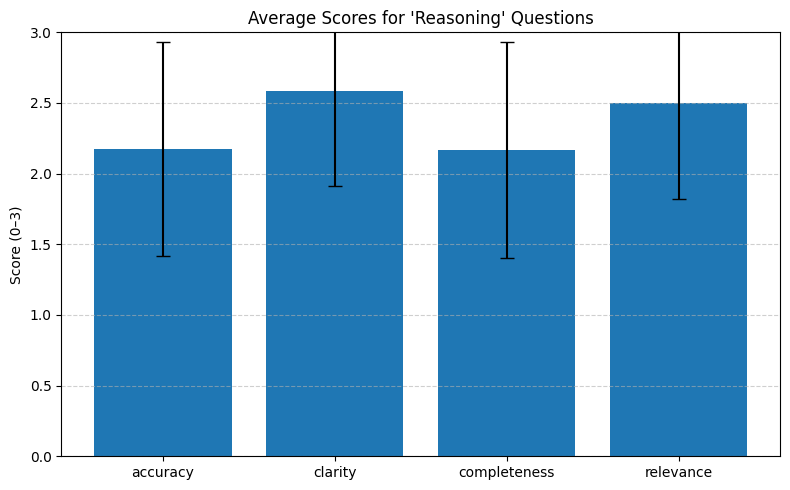

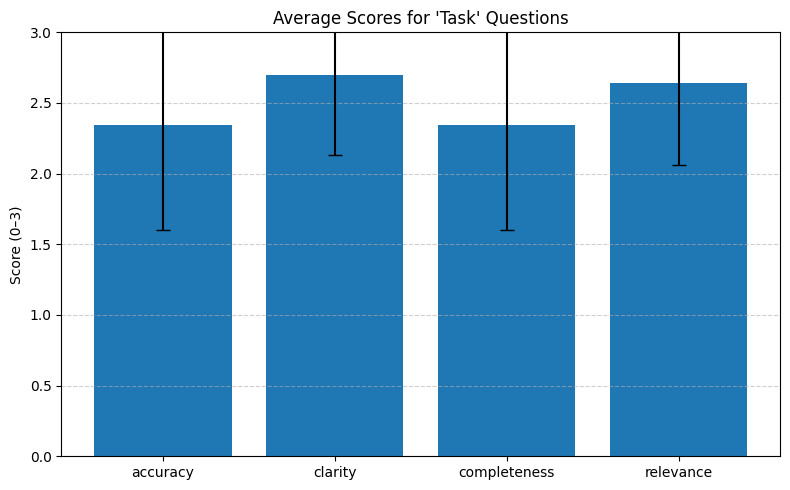


Summary table:

           Question Type     Accuracy Completeness      Clarity    Relevance
0              Algorithm  2.00 (0.74)  2.00 (0.74)  2.33 (0.78)  2.33 (0.78)
1     Code Understanding  2.41 (0.68)  2.41 (0.69)  2.65 (0.58)  2.67 (0.57)
2                  Error  2.33 (0.70)  2.36 (0.71)  2.73 (0.53)  2.74 (0.52)
3  Function/Syntax Usage  1.99 (0.74)  1.99 (0.75)  2.50 (0.70)  2.44 (0.70)
4          Logical Error  2.14 (0.74)  2.14 (0.74)  2.70 (0.64)  2.67 (0.64)
5                  Other  2.06 (0.78)  2.08 (0.79)  2.56 (0.67)  2.46 (0.67)
6              Reasoning  2.18 (0.76)  2.17 (0.76)  2.59 (0.68)  2.50 (0.68)
7                   Task  2.34 (0.74)  2.35 (0.74)  2.70 (0.57)  2.64 (0.58)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ==============================
# Step 1: Load the dataset
# ==============================
df = pd.read_csv("CS1QA_Codellama_student_evaluations.csv")

metrics = ["accuracy", "clarity", "completeness", "relevance"]

# ==============================
# Step 2: Automatic question-type classification
# ==============================
def classify_question_type_text(q):
    q = str(q).lower()

    if re.search(r"\b(typeerror|nameerror|indexerror|keyerror|valueerror|syntaxerror|traceback|exception|error)\b", q):
        return "Error"
    if re.search(r"\b(explain|what does this code do|meaning of|why does|what is happening)\b", q):
        return "Code Understanding"
    if re.search(r"\b(algorithm|approach|complexity|big[- ]o|optimi[sz]e)\b", q):
        return "Algorithm"
    if re.search(r"\b(how do i|how to|syntax|parameter|argument|import|call this function|use .* function)\b", q):
        return "Function/Syntax Usage"
    if re.search(r"\b(wrong output|bug|doesn't work|doesnt work|unexpected|logic|logical|correct but)\b", q):
        return "Logical Error"
    if re.search(r"\b(reason|because|prove|justify)\b", q):
        return "Reasoning"
    if re.search(r"\b(task\d+|assignment|problem|task )\b", q):
        return "Task"

    return "Other"

df["question_type"] = df["question"].apply(classify_question_type_text)

print("\nQuestion type distribution:\n")
print(df["question_type"].value_counts())

# ==============================
# Step 3: Visualization function
# ==============================
def visualize_scores(subset, title):
    stats = subset[metrics].agg(["mean", "std"]).T.fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(stats.index, stats["mean"], yerr=stats["std"], capsize=5)
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# ==============================
# Step 4: Generate plots
# ==============================
for qtype, subset in df.groupby("question_type"):
    if subset[metrics].notna().any().any():
        visualize_scores(subset, f"Average Scores for '{qtype}' Questions")

# ==============================
# Step 5: Summary table
# ==============================
summary_rows = []

for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for m in metrics:
        row[(m, "mean")] = subset[m].mean()
        row[(m, "std")] = subset[m].std()
    summary_rows.append(row)

summary = pd.DataFrame(summary_rows)

pretty = {"Question Type": summary["Question Type"]}
for m in metrics:
    mean = summary[(m, "mean")]
    std = summary[(m, "std")].fillna(0)
    pretty[m.capitalize()] = mean.map(lambda x: f"{x:.2f}" if pd.notna(x) else "N/A") + \
                              " (" + std.map(lambda x: f"{x:.2f}") + ")"

summary_df = pd.DataFrame(pretty)[
    ["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]
]

print("\nSummary table:\n")
print(summary_df)
